<a href="https://colab.research.google.com/github/jli5064/Projects/blob/main/Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Sales



In [ ]:
!git clone https://github.com/jli5064/Projects

Cloning into 'Projects'...


<a id='research_question'></a>
# Research Question

Which attribute of a video game (critic scores, user scores, etc.) is the biggest contributor to sales globally?

#Background and Prior Work
Playing video games has become a big part of people's lives, people play video games to relax and take a break from stressful work. Based on a study from 2017, there are 2.2 billion active video gamers around the world, and around half of them spend money playing games (1). I believe that there are several factors that determine how much people spend on video games and my goal is to identify which one is the primary contributor to people's video game related spendings.
Before purchasing a video game, most consumers look at various reviews, such as critic scores and user scores, to determine whether or not they should spend their hard earned money on that particular game. However, does one of these main sources of opinion hold more influence over consumers, or is there an additional factor that influences the choice to purchase a game? According to the Metacritic website, there have been many games where the critic scores and user scores varied greatly (2). The purpose of this project is to find out which attribute holds a greater influence over whether or not a game will sell well. However, besides these main attributes, like user score and critic score, there can be other factors that influence game sales, such as cultural differences, income levels, and impulsiveness. The site webpals (3) states that "Asian players spend 1.5 times more on games than North American players", these regional differences, whether it be cultural or attitudes towards gaming, could be a significant factor to if a game will sell well or not. 
However, while the majority of video game consumers only purchase a video game once, the same cannot be said regarding the select few (known as "whales" within the industry) who bring in the majority of the revenue within Free-To-Play business models (4). 


References:
- 1) https://cs-agents.com/blog/game-review-affect-game-purchases/
- 2) https://www.metacritic.com/feature/game-critic-scores-vs-user-reviews
- 3) https://www.webpals.com/mobile/webpals-mobile-asian-american-mobile-gamers/
- 4) https://www.alistdaily.com/strategy/mobile-gaming-whales-fitting-new-descriptors/

#Hypothesis
Out of the attributes that will be examined, user score will most heavily impact video game sales. User scores may be gauged through Amazon reviews, Steam reviews, and user Metacritic scores. In comparison to critic scores, the quantity of user ratings vastly outnumber critics. Thus, casual consumers are  immediately exposed more to user reviews on the internet. The information that both critic scores and user scores may not be reliable, but due to the vast amount of critical reviews per title, interested consumers have the option to look for commonalities throughout them and find the average consensus to how the majority feel about the game. Additionally, many video game distributors have user reviews on each games' page, allowing for potential buyers to see what others think, which gives user ratings more influence over a person's choice to buy a game. 



#Data 
The ideal dataset for this question would be one that has variables for critic score, user score, age rating, sales both globally and regionally, sales by platform, price, the development budget, and the marketing budget. It would also have more specific variables that accounts for other factors, such as average mental wellness and household income of a region, the cultural differences of the region, and the target audience of the title. These additional pieces of information could probably be found in another dataset that is not necessarily related to video games. It would have observations for all game titles, and the data would be collected from the sales records of game developers and retailers. The data would be organized in a structured or semi-structured format and tidy format that makes it easy to manipulate and read. 

Since I cannot feasibly and reliably collect a vast amount of data to analyze, I will depend on databases for datasets that have already been collected and organized by other parties. This data will ideally contain no personal information in order to retain the anonymity of each person who submitted information along with having each person's personal consent for their data to be used for research purposes, making it ethically usable for the purposes of our research project. Since the data would already be available on a public database, I would not have to take measures to securely store the data since anybody can access it already.  

Most likely, even with the ideal dataset, I will not have enough to definitively prove causation. At best, I will be able to form a strong correlation among these variables and video game sales.

#Ethics and Privacy
When answering the question regarding which attribute (critic score, user score, rating) affects video game sales the most, privacy will likely be maintained as there should be no identifying information that can be linked to a specific person due to the dataset only providing scores and ratings. The datasets that will be used will be taken from public online databases, so our group does not need to securely store the datasets I use since it is already available for anybody to download and examine.

This study can help identify exactly which attribute affects video game sales the most. Stakeholders in this question are players, game developers, critics, and retailers. Knowing what affects game sales could help players better identify which games are worth purchasing and for developers to know what to target to increase the likelihood of people purchasing their games. It could also affect the sales numbers of retailers, the reputation of critics, and both of the above factors for game developers.

This question will give us insight into what the average consumer of video games look like, and what drives them to spend money on gaming purchases. 

The information gained from this study could be used for negative purposes, such as designing a game that is not fun to play, yet is very profitable, or for using predatory tactics to manipulate players into spending the most money. However, this is not a concern for the project because game developers are already conducting this kind of research internally. Releasing the results of this study would then be of benefit to players, who would be better informed against predatory tactics, while being of little benefit to those who intend to use said tactics and are already researching this topic anyway.

# Setup

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy
import requests
import io
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

# Dataset(s)


Video Games Sales with Ratings
https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

Number of observations: 16719  
Number of unique observations: 11563

This dataset provides information about each game (publisher, genre, platform, year of release) along with the sales  in the NA, EU, JP, and other regions.



# Data Cleaning

After reading in the raw data, the first step is to find how many missing values there are, and in  which columns. Since there are not too many missing values in the columns for Name, Year of Release, Genre, and Publisher, the rows with missing values from these columns are dropped. The columns for Critic Score, Critic Count, User Score, Developer, and Rating have very many missing values. From the first few rows of the dataset I can see that there are two titles with missing values in all of these columns, Super Mario Bros. and Pokemon Red/Blue. Both of these titles are quite old, released in 1985 and 1996 respectively, so it may be that the high number of missing values is because many video game titles were released before the Critic Score, Critic Count, etc. could be tracked. Therefore, I may try to find in which year did all of these attributes start being tracked, and limit the scope of the data accordingly. 

In [ ]:
#Using a Personal Access Token since the repo is private

username = 'ezradtsang'
token = 'e6f291f8e16d129bb8996cfefb0751b41edcd520'
session = requests.Session()
session.auth = (username, token)

dl = session.get('https://raw.githubusercontent.com/COGS108/group070_wi21/main/Video_Games_Sales_as_at_22_Dec_2016.csv').content
vg = pd.read_csv(io.StringIO(dl.decode('utf-8')))
print(vg.shape)
vg.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vg.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
vg = vg.dropna(axis='rows', subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])

vg = vg.dropna(axis='rows', how='any')
print(vg.shape)

(6825, 16)


Once the observations with any missing values are dropped, I need to check the data types.

In [ ]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

For some reason, the data type of the User_Score column is Object. I need to make it a numeric type.

In [ ]:
vg['User_Score'] = pd.to_numeric(vg['User_Score'])

Checking the data types again, the User_Score column was successfully converted into the float64 data type.

In [ ]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Once the observations with any missing values are dropped, I sort by release date and find that there are games as old as Super Mario Bros. that do not have any missing attributes, so I will either have to work with the observations that have all the attributes (6825 observations, 16 attributes), or drop the attributes that had a lot of missing values (16416 observations, 10 attributes). 

In [ ]:
vg.sort_values(by=['Year_of_Release'])
vg_clean_0 = copy.deepcopy(vg)
vg_clean_1 = copy.deepcopy(vg)

In [ ]:
vg_clean_1 = vg_clean_1.dropna(axis='columns', how='any')
print(vg_clean_1.shape)
vg_clean_1.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Since the option of dropping attributes doesn't leave many attributes that could answer our question, I will have to use the former option and drop observations that don't have the attributes Critic Score, Critic Count, etc.

In [ ]:
vg_clean_0.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Looking at the index of vg_clean_0, I can see that the index skips some numbers due to the rows I dropped. In order to keep things clean, I will reset the index to ensure there are no gaps between the indices. 

In [ ]:
vg_clean_0 = vg_clean_0.reset_index(drop = True)
vg_clean_0.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


I also must consider the platform of the game title. Since the same game can have different sales numbers when it is sold on different platforms, I can  make another version of the dataset that combines the sales of title across all platforms using an aggregation.

In [ ]:
vg_no_plat = vg_clean_0
platform_aggregation = {'Name': 'first', 'Platform': 'first', 'Year_of_Release': 'first', 'Genre': 'first', 'Publisher': 'first', 'NA_Sales': 'sum', 
                        'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum', 'Critic_Score': 'mean', 
                        'Critic_Count': 'sum', 'User_Score': 'mean', 'User_Count': 'sum', 'Developer': 'first', 'Rating': 'first'}
vg_no_plat =  vg_no_plat.astype({'Critic_Score': 'float64', 'User_Score': 'float64'})
vg_no_plat = vg_no_plat.groupby('Name').aggregate(platform_aggregation)
vg_no_plat = vg_no_plat.drop(columns=['Platform'])
vg_no_plat = vg_no_plat.reset_index(drop=True)

To make sure the aggregation worked, I check the game Grand Theft Auto V, which has released on many platforms, in both dataframes.

In [ ]:
vg_clean_0.loc[vg_clean_0['Name'] == 'Grand Theft Auto V']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
10,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
13,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
27,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
118,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1100,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [ ]:
vg_no_plat.loc[vg_no_plat['Name'] == 'Grand Theft Auto V']

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1491,Grand Theft Auto V,2013.0,Action,Take-Two Interactive,23.84,23.42,1.42,7.9,56.57,96.8,245.0,8.08,15124.0,Rockstar North,M


The aggregation was successful.

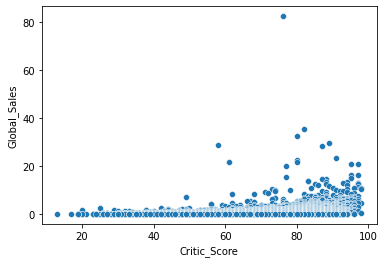

In [ ]:
sns.scatterplot(x='Critic_Score', y='Global_Sales' , data=vg_clean_0)

Looking at the scatterplot of Critic_Score and Global_Sales, I can see that there are several games where the Global Sale has been inputted at a value of 0. What this means is that the data is not available for those titles since they were not recorded at the time. Due to this, I will be removing the games with a value for 0 in sales when comparing it to the game features. 

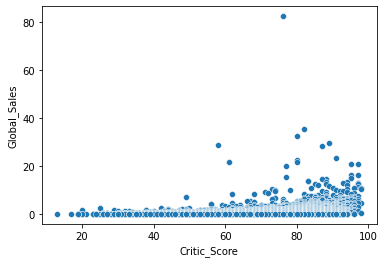

In [ ]:
global_sales_cleaned = vg_clean_0[vg_clean_0.get('Global_Sales')>0]

sns.scatterplot(x='Critic_Score', y='Global_Sales', data=global_sales_cleaned)

In [ ]:
#There's a point that is much higher than all the others, with over 80 million global sales.
vg_clean_0[vg_clean_0.get('Global_Sales')>60]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


After looking up this game and researching more about it, Wii Sports' massive sales numbers can be explained by the fact that it was bundled with the purchase of a Wii console as well as its wide appeal even to those that may not consider themselves as "video-gamers". Additionally, the Wii was very a very popular console when it was first released due to it having innovative motion detecting controls. Since the Wii console was a new, trendy console on release, players were probably choosing to buy the Wii because of the console itself, and not because of Wii Sports.

In [ ]:
#Let's compare Wii Sports to another popular game.

vg_clean_0[vg_clean_0.get('Name') == 'Wii Sports']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


In [ ]:
vg_no_plat[vg_no_plat.get('Name') == 'Grand Theft Auto V']

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1491,Grand Theft Auto V,2013.0,Action,Take-Two Interactive,23.84,23.42,1.42,7.9,56.57,96.8,245.0,8.08,15124.0,Rockstar North,M


Comparing the User Count attributes of Wii Sports and another high-selling game, Grand Theft Auto V, supports the explanation that consumers purchased the Wii for the console itself, not for Wii Sports. GTA V has more than 15 thousand user reviews, while Wii Sports only has 322.

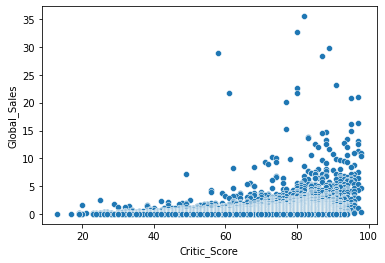

In [ ]:
#A graph without the Wii Sports outlier
global_sales_cleaned = vg_clean_0[vg_clean_0.get('Global_Sales')<40]
critic = global_sales_cleaned['Critic_Score'].astype('float64')
sns.scatterplot(x=critic, y='Global_Sales', data=global_sales_cleaned)

[]

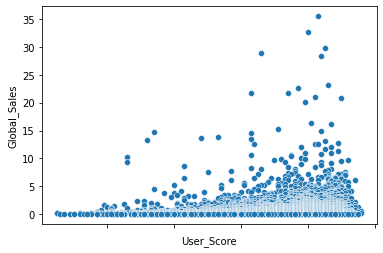

In [ ]:
#Now to compare User Score and Global Sales
user = global_sales_cleaned['User_Score'].astype('float64')
sns.scatterplot(x=user, y='Global_Sales', data=global_sales_cleaned).set_xticklabels([])

The scatterplot of User Score and Global Sales is very similar to that of Critic Score and Global Sales.

I can also look at how critic score is related to user score. There is a significant, moderate positive correlation between the two attributes, with a Pearson coefficient of 0.58 and a p-value of 0.0. The p-value being below 0.05 thus means there is a significant difference between both variables. 

In [ ]:
sns.scatterplot(x='Critic_Score', y='User_Score', data=global_sales_cleaned).set_yticklabels([])

from scipy.stats import pearsonr
pearsonr(critic, user)

NameError: ignored

Both the distributions of the critic and user scores are skewed left, but the user scores are more skewed.

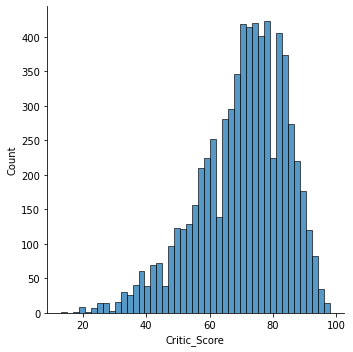

In [ ]:
sns.displot(critic)

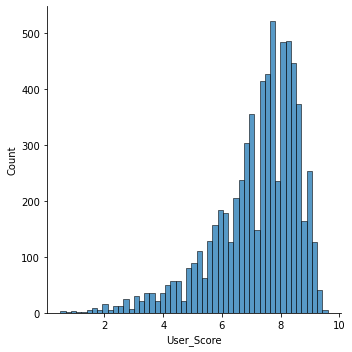

In [ ]:
sns.displot(user)

# Data Analysis & Results (EDA)

**Granularity**

Each observation represents a game release on one platform. There might be multiple releases of the same game across different platforms. I have a version of the dataframe that aggregates all the platforms for the same game title into one observation, if necessary.

**Scope**

There were quite a few observations that had missing user and critic score data, which are the variables I was interested in. I decided to drop these observations, even though they made up a significant portion of the data.


**Temporality**

The data is from 2016, so it is somewhat outdated. Each game has a year of release for each platform it was released on. Our aggregated dataframe uses the earliest release year for each game title. 

**Faithfulness**

Since the data is from 2016 it is not representative of today's games.  Additionally, the figures are from Metacritic which gets data from mostly English-speaking publications, so it might not fully represent the whole world.

In [ ]:
vg_clean_0.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [ ]:
# user_count mean vs median is very different, 174 vs 27, meaning that there is an outlier somewhere?
# mean is probably being dragged up by the gigantic games, like Wii Sports or GTA V

In [ ]:
# Critic Score vs. Global Sales
outcome_critic, predictors_critic = patsy.dmatrices('Critic_Score ~ Global_Sales', vg_clean_0)
model_critic = sm.OLS(outcome_critic, predictors_critic)
results_critic = model_critic.fit()
print(results_critic.summary())

                            OLS Regression Results                            
Dep. Variable:           Critic_Score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     408.1
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.51e-88
Time:                        02:40:50   Log-Likelihood:                -27433.
No. Observations:                6825   AIC:                         5.487e+04
Df Residuals:                    6823   BIC:                         5.488e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.9673      0.175    393.191   

Running an OLS regression analysis on Critic Score vs. Global sales show us that the effect size (𝛽1) of Global Sales with regard to Critic Score is 1.6779. This means that for every increase of 1 unit in Global_Sales, there is about a 1.6779 unit increase in Critic Score.

In [ ]:
# User Score vs. Global Sales
outcome_user, predictors_user = patsy.dmatrices('User_Score ~ Global_Sales', vg_clean_0)
model_user = sm.OLS(outcome_user, predictors_user)
results_user = model_user.fit()
print(results_user.summary())

                            OLS Regression Results                            
Dep. Variable:             User_Score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     53.68
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.64e-13
Time:                        02:40:50   Log-Likelihood:                -12145.
No. Observations:                6825   AIC:                         2.429e+04
Df Residuals:                    6823   BIC:                         2.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1352      0.019    382.071   

As for User Score vs. Global Sales, running an OLS regression shows us that the effect size between User_Score and Global_Sales is 0.0648. This means that for every increase of 1 unit in Global_Sales, User Score increases by about 0.0648

Since I have two predictors (Critic Score and User Score) that I want to analyze in relationship to Global Sales, I can carry out a multiple linear regression. 

In [ ]:
# Multiple Linear Regression

outcome, predictors = patsy.dmatrices('Global_Sales ~ Critic_Score + User_Score', vg_clean_0)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     218.2
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.37e-92
Time:                        02:40:50   Log-Likelihood:                -14077.
No. Observations:                6825   AIC:                         2.816e+04
Df Residuals:                    6822   BIC:                         2.818e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2854      0.132     -9.708   

From this OLS I can see that the R-squared and the Adj. R-squared values are very small, with both being 0.060. This means the model is not a good fit and I would be better trying an alternative model or try to log scale it to make it linear.

In [ ]:
# log adjust the model
# multiply User Score by 10 to better match critic score
# Looking back at the global sales vs critic/user score scatterplots, they seem to be heteroscedastic

vg_clean_0['global_log10'] = np.log10(vg_clean_0['Global_Sales'])
vg_clean_0['user_x10'] = 10 * vg_clean_0['User_Score']
outcome, predictors = patsy.dmatrices('global_log10 ~ Critic_Score + user_x10', vg_clean_0)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           global_log10   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     532.8
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          9.88e-216
Time:                        02:40:50   Log-Likelihood:                -5788.9
No. Observations:                6825   AIC:                         1.158e+04
Df Residuals:                    6822   BIC:                         1.160e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5536      0.039    -39.520   

The reason why I multiplied user score by 10 is to better match the critic score. The user score is out of ten points, while critic score is out of a hundred points. By multiplying user score by 10, it will make it on the same scale as critic score. 

After using a log 10 transformation of global sales, the R-squared value has increased to 0.135, but this is still quite low. Another model might be more suitable. I will try the Generalized Least Squares test since the data appears to be non-linear.

In [ ]:
# GLS

vg_exog = vg_clean_0[['Critic_Score', 'user_x10']]
vg_endog = vg_clean_0['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog, vg_exog)
results = model.fit()
print(results.summary())

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.176
Model:                            GLS   Adj. R-squared (uncentered):              0.176
Method:                 Least Squares   F-statistic:                              730.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                   3.63e-288
Time:                        02:40:50   Log-Likelihood:                         -14124.
No. Observations:                6825   AIC:                                  2.825e+04
Df Residuals:                    6823   BIC:                                  2.827e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Using generalized regression gives a slightly better fit, with an R-squared value of 0.176. From this it seems that critic score has some positive relationship with global sales (coefficient of 0.0306), while user score actually has a negative one (coefficient of -0.0185). The negative relationship between user score and global sales might be caused by games that have very small but devoted playerbases rating them very high (e.g. Undertale, Cuphead), while mass market games might sell a lot but the players may not be as satisfied (e.g. Call of Duty, Cyberpunk 2077). It might be worth reexamining the data for larger games and smaller games separately.

In [ ]:
#Adjusting scale of User_Score column and log transforming the Global_Sales column from the vg_no_plat dataframe
vg_no_plat['global_log10'] = np.log10(vg_no_plat['Global_Sales'])
vg_no_plat['user_x10'] = 10 * vg_no_plat['User_Score']
vg_no_plat.sort_values(by='User_Count', ascending = False).reset_index(drop=True).head()

# We'll be using the aggregated dataframe here to combine the counts for each title

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,global_log10,user_x10
0,The Witcher 3: Wild Hunt,2015.0,Role-Playing,Namco Bandai Games,1.92,3.09,0.23,0.75,6.00,92.000000,124.0,9.233333,24807.0,CD Projekt Red Studio,M,0.778151,92.333333
1,Call of Duty: Modern Warfare 3,2011.0,Shooter,Activision,15.54,11.15,0.62,3.29,30.59,81.000000,162.0,2.725000,20053.0,"Infinity Ward, Sledgehammer Games",M,1.485579,27.250000
2,The Elder Scrolls V: Skyrim,2011.0,Role-Playing,Bethesda Softworks,8.76,7.51,0.35,2.45,19.08,94.000000,137.0,7.633333,15189.0,Bethesda Game Studios,M,1.280578,76.333333
3,Grand Theft Auto V,2013.0,Action,Take-Two Interactive,23.84,23.42,1.42,7.90,56.57,96.800000,245.0,8.080000,15124.0,Rockstar North,M,1.752586,80.800000
4,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,5.55,5.26,0.25,1.61,12.67,86.333333,135.0,6.033333,13489.0,Bethesda Game Studios,M,1.102777,60.333333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


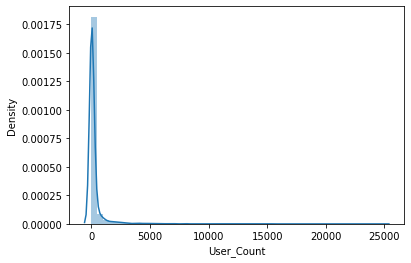

In [ ]:
sns.distplot(vg_no_plat['User_Count'])

Looking at the distribution plot of the User Count in the dataframe vg_no_plat, the majority of the games have below 2,000 users. There are a few exceptions in the dataframe with a few games having more than 2,000 users up to 25,000 users. 

In [ ]:
#Let's look at how many games have above a 2,000 User Count in vg_no_plat
vg_over_2000 = vg_no_plat[vg_no_plat['User_Count']>=2000]
vg_over_2000.shape

(136, 17)

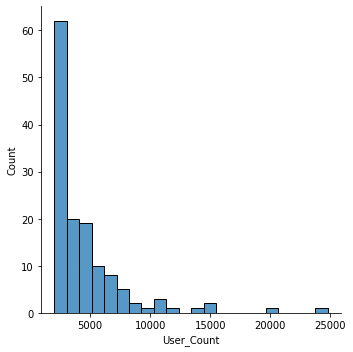

In [ ]:
sns.displot(vg_over_2000['User_Count'])

After filtering out games that have over a User Count of over 2,000, there are 136 games left in the reduced dataframe. 

In [ ]:
vg_under_2000 = vg_no_plat[vg_no_plat['User_Count'] < 2000]
vg_under_2000.shape

(4241, 17)

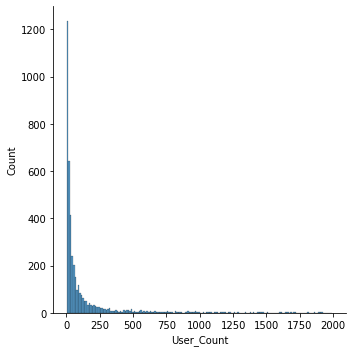

In [ ]:
sns.displot(vg_under_2000['User_Count'])

Looking at the games within the vg_no_plat dataframe that has a User Count of less than or equal to *2*,000 gives us a reduced dataframe with 4,241 entries. Let's try running the GLS test again on these reduced dataframes. 

In [ ]:
#GLS for games that have greater than or equal to 2,000 users.
vg_exog_big = vg_over_2000[['Critic_Score', 'user_x10']]
vg_endog_big = vg_over_2000['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_big, vg_exog_big)
results = model.fit()
print(results.summary())

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.501
Model:                            GLS   Adj. R-squared (uncentered):              0.493
Method:                 Least Squares   F-statistic:                              67.19
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                    6.18e-21
Time:                        02:40:52   Log-Likelihood:                         -459.90
No. Observations:                 136   AIC:                                      923.8
Df Residuals:                     134   BIC:                                      929.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
#GLS for games that have less than 2,000 users.
vg_exog_small = vg_under_2000[['Critic_Score', 'user_x10']]
vg_endog_small = vg_under_2000['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.197
Model:                            GLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              518.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                   2.55e-202
Time:                        02:40:52   Log-Likelihood:                         -9646.9
No. Observations:                4241   AIC:                                  1.930e+04
Df Residuals:                    4239   BIC:                                  1.931e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

The User Score coefficient is still negative though. I expected that for smaller games, higher user score would lead to higher sales due to more devoted players. I need to check the data again.

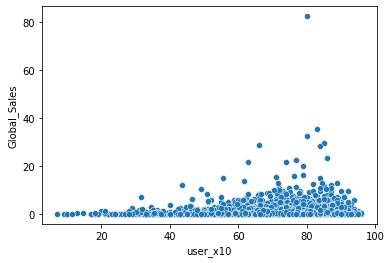

In [ ]:
#Taking a look at the relationship between user score and global sales for games with less than 2000 user count.
sns.scatterplot(x='user_x10', y='Global_Sales', data=vg_under_2000)

There's a game here with more than 80 million sales that looks familiar.

In [ ]:
vg_under_2000[vg_under_2000.get('Global_Sales')>60]

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,global_log10,user_x10
4215,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1.916612,80.0


It's Wii Sports again, which doesn't fit the idea of 'smaller game', but it has such a low user count of 322. When considering that the user count is measured from user reviews on Metacritic, this starts to make more sense. Hardly anyone bothered to leave a review of Wii Sports on Metacritic because most people received the game for free along with their Wii console and thus are probably not very devoted to the game. I need to find another way to split 'larger' games from 'smaller' games. Lower sales numbers should indicate a smaller game.

(0.0, 50.0)

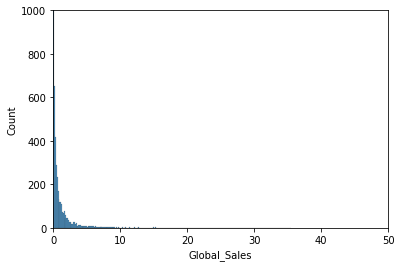

In [ ]:
vg_no_plat = vg_no_plat[vg_no_plat['Global_Sales'] < 40]

sns.histplot(vg_no_plat['Global_Sales'])
plt.ylim(0, 1000)
#Cutting off the x-axis since we excluded the Wii Sports outlier
plt.xlim(0, 50)

Looking at the distribution of sales numbers, almost all games have less than 10 million sales. How many have less than 5 million? 1 million? Half a million?

In [ ]:
print('Proportion of games with less than 10 million sales:', sum(vg_no_plat['Global_Sales'] < 10) / len(vg_no_plat))
print('Proportion of games with less than 5 million sales:', sum(vg_no_plat['Global_Sales'] < 5) / len(vg_no_plat))
print('Proportion of games with less than 1 million sales:', sum(vg_no_plat['Global_Sales'] < 1) / len(vg_no_plat))
print('Proportion of games with less than half a million sales:', sum(vg_no_plat['Global_Sales'] < 0.25) / len(vg_no_plat))

Proportion of games with less than 10 million sales: 0.9874285714285714
Proportion of games with less than 5 million sales: 0.9501714285714286
Proportion of games with less than 1 million sales: 0.7124571428571429
Proportion of games with less than half a million sales: 0.3913142857142857


95% of games have less than 5 million sales, and 71% of games have less than 1 million sales. I will run the GLS for both of these cases, starting with games that have less than 5 million sales.

In [ ]:
vg_under_5m = vg_no_plat[vg_no_plat['Global_Sales'] < 5]

#GLS for games that have less than 5 million sales.
vg_exog_small = vg_under_5m[['Critic_Score', 'user_x10']]
vg_endog_small = vg_under_5m['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())
under_5 = results.params

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.447
Model:                            GLS   Adj. R-squared (uncentered):              0.446
Method:                 Least Squares   F-statistic:                              1677.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                        0.00
Time:                        02:40:53   Log-Likelihood:                         -5490.7
No. Observations:                4157   AIC:                                  1.099e+04
Df Residuals:                    4155   BIC:                                  1.100e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
vg_over_5m = vg_no_plat[vg_no_plat['Global_Sales'] > 5]

#GLS for games that have more than 5 million sales.
vg_exog_small = vg_over_5m[['Critic_Score', 'user_x10']]
vg_endog_small = vg_over_5m['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())
over_5 = results.params

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.724
Model:                            GLS   Adj. R-squared (uncentered):              0.721
Method:                 Least Squares   F-statistic:                              281.3
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                    9.52e-61
Time:                        02:40:53   Log-Likelihood:                         -691.08
No. Observations:                 217   AIC:                                      1386.
Df Residuals:                     215   BIC:                                      1393.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Now for games that have less than 1 million sales:

In [ ]:
vg_under_1m = vg_no_plat[vg_no_plat['Global_Sales'] < 1]

#GLS for games that have less than 1 million sales.
vg_exog_small = vg_under_1m[['Critic_Score', 'user_x10']]
vg_endog_small = vg_under_1m['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())
under_1 = results.params

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.581
Model:                            GLS   Adj. R-squared (uncentered):              0.581
Method:                 Least Squares   F-statistic:                              2160.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                        0.00
Time:                        02:40:53   Log-Likelihood:                         -125.75
No. Observations:                3117   AIC:                                      255.5
Df Residuals:                    3115   BIC:                                      267.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
vg_over_1m = vg_no_plat[vg_no_plat['Global_Sales'] > 1]

#GLS for games that have more than 1 million sales.
vg_exog_small = vg_over_1m[['Critic_Score', 'user_x10']]
vg_endog_small = vg_over_1m['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())
over_1 = results.params

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.485
Model:                            GLS   Adj. R-squared (uncentered):              0.484
Method:                 Least Squares   F-statistic:                              587.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                   1.59e-180
Time:                        02:40:53   Log-Likelihood:                         -3396.1
No. Observations:                1250   AIC:                                      6796.
Df Residuals:                    1248   BIC:                                      6807.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

And for games that have less than half a million sales:

In [ ]:
vg_under_halfm = vg_no_plat[vg_no_plat['Global_Sales'] < 0.5]

#GLS for games that have less than half a million sales.
vg_exog_small = vg_under_halfm[['Critic_Score', 'user_x10']]
vg_endog_small = vg_under_halfm['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())
under_half = results.params

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.649
Model:                            GLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              2245.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                        0.00
Time:                        02:40:53   Log-Likelihood:                          1483.5
No. Observations:                2431   AIC:                                     -2963.
Df Residuals:                    2429   BIC:                                     -2951.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
vg_over_halfm = vg_no_plat[vg_no_plat['Global_Sales'] > 0.5]

#GLS for games that have more than half a million sales.
vg_exog_small = vg_over_halfm[['Critic_Score', 'user_x10']]
vg_endog_small = vg_over_halfm['Global_Sales']
model = sm.regression.linear_model.GLS(vg_endog_small, vg_exog_small)
results = model.fit()
print(results.summary())
over_half = results.params

                                 GLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.415
Model:                            GLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              680.2
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                   5.09e-224
Time:                        02:40:53   Log-Likelihood:                         -4939.4
No. Observations:                1921   AIC:                                      9883.
Df Residuals:                    1919   BIC:                                      9894.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
print('Under 5 million sales:\n', under_5, '\n')
print('Over 5 million sales:\n', over_5, '\n')
print('Under 1 million sales:\n', under_1, '\n')
print('Over 1 million sales:\n', over_1, '\n')
print('Under half a million sales:\n', under_half, '\n')
print('Over half a million sales:\n', over_half, '\n')

Under 5 million sales:
 Critic_Score    0.026491
user_x10       -0.014631
dtype: float64 

Over 5 million sales:
 Critic_Score    0.189131
user_x10       -0.083520
dtype: float64 

Under 1 million sales:
 Critic_Score    0.004296
user_x10        0.000067
dtype: float64 

Over 1 million sales:
 Critic_Score    0.110115
user_x10       -0.067993
dtype: float64 

Under half a million sales:
 Critic_Score    0.001894
user_x10        0.000717
dtype: float64 

Over half a million sales:
 Critic_Score    0.097411
user_x10       -0.064304
dtype: float64 



The results for splitting larger/smaller games at the 5 million sales mark are that critic score has a greater relation to larger games that it does on smaller games, with coefficients of 0.189 and 0.026 respectively. User score also has a greater relation to larger games than it does for smaller ones, with coefficients of -0.084 and -0.015 respectively. Critic score is more strongly related to sales numbers than user score is in both groups since its coefficients are greater in magnitude.

For splitting larger/smaller games at the 1 million sales mark, critic score again has a greater relation to larger games than it does for smaller games, with coefficients of 0.110 and 0.004 respectively. User score has a greater relation to larger games in magnitude - it has a coefficient of -0.068 for larger games. However for smaller games it has a slight positive relationship, with a coefficient of 6.7e-5. Again, critic score has a stronger relationship to the sales numbers than user score does for both larger and smaller games.

Splitting larger/smaller games at the half a million sales mark, the results are again similar to the previous two cases with the notable difference being that the user score coefficient for smaller games is greater than it was for the 1 million split, with a value of 7.2e-4 compared to 6.7e-5. 

# Conclusion & Discussion

**Conclusion**

The results were than in all cases, critic score had a stronger, positive relationship to global sales numbers than user score did, which is contrary to our hypothesis that user score would have a stronger impact on sales than critic score. User score tended to have a negative relationship of low magnitude to global sales numbers. However, for games that had less than 1 million sales, there was a very small positive relationship between user score and sales numbers. Furthermore, for games that had less than half a million sales, the positive correlation increased by about a factor of 10 when compared to games under 1 million sales. This supports our proposed explanation for why user score was negatively correlated with global sales numbers: games with small playerbases would have players that were more devoted, or perhaps more forgiving of flaws, while games with large playerbases might have players that are not as dedicated, or have higher expectations and  thus more critical of flaws.  

As for explaining the difference between the critic score and user score correlations, critic score most likely has a stronger relationship to sales numbers because many players will decided whether or not to buy the game based on critic reviews. User score's smaller magnitude correlation with sales numbers could be explained by the fact that it does not exist until after a game is released, while critics are normally allowed to post their reviews a few days before release. Also, some players may wait to buy the game after seeing what other players think about the game first. Another reason for why user score had a smaller correlation with sales numbers could be because there are more user ratings and critic ratings. The larger size of this population can lead to more variability with the user ratings, which then leads to less of a correlation between user rating and global sales. 

**Discussion and Limitations**

For this project I did encounter a few limitations. For one, the dataset that I analyzed is from 2016 and prior, meaning that our analysis and predictor is possibly not accurate in relation to the games that are released and sold in the years up to current time. Especially with new consoles, such as the Nintendo Switch, and the ease of buying games through online stores, such as Steam, the relationship between user score, critic score, and global sales may have shifted in the past few years. Additionally, the number of releases of video games has progressively grown over the years with the overall quality of these games improving as well as the ease of purchasing digital copies of these games through online stores. Finally, our data is from Metacritic, which represents mostly English-speaking reviewers and can be missing data from well-known titles such as Super Mario Bros.

**Impact**

From our analysis on the relationship between critic score, user score, and global sales for video games, I concluded that critic score has a more influence over global sales than user score. With this information, video games producers and comapanies can design their game to be scored higher by critics since there is a significant positive relationship between global sales and critic scores. Additionally, due to the fact that critic scores come out before a game is actually released and being the only indication at the time about whether a game is good or not, developers can gauge if their game will likely be successful or not. All in all, our findings are nothing new to video game developers and that ultimately, games of good quality are responded well in both critic and user scores which drives sales in the end.  

As for the comsumers of video games, from our study they can conclude that when shopping for a new game, in most cases high critic score correlates to high sales, and when a game has high sales it means it is a popular pick. Since there is a negative correlation between global sales and user score, potential buyers might be more wary since they may be disappointed by a popular game. Ergo by that logic consumers should lean more towards critic scores to find higher quality games, although like many other products consumers have copius amounts of variables when debating the purchase of a video game.   



